<a href="https://colab.research.google.com/github/ftk1000/pyviz/blob/master/tSNE_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int) 
print(type(data))

<class 'tuple'>


In [11]:
assert len(data)==2                # two elements in a tuple
assert len(data[0])==70000         # 0th element of the tuple  is a list of digitized numbers
print(len(data[0][0]))             # each number has 784 pixels
print(len(data[1]))                # 70000 target value = digits
print(data[1])

784
70000
['5' '0' '4' ... '4' '5' '6']


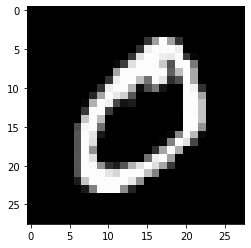

In [4]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [12]:
Npnts = 5000
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:Npnts,:])
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:Npnts])),
    columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


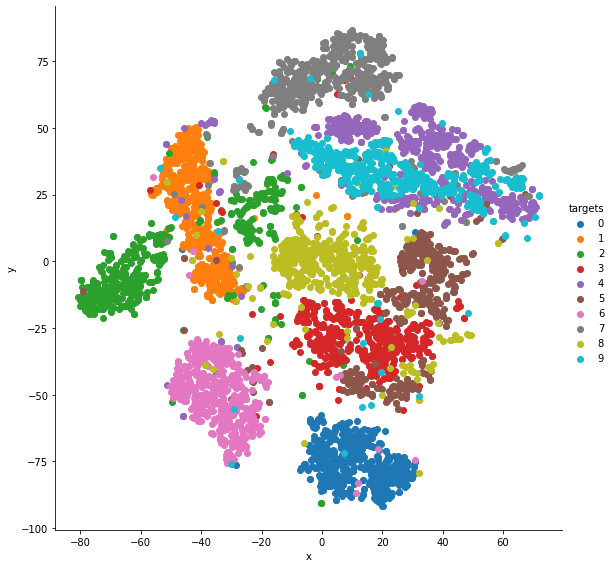

In [13]:
grid = sns.FacetGrid( tsne_df, hue="targets", size=8)
grid.map( plt.scatter, "x", "y" ).add_legend()